# Linear regression

Linear regression is perhaps the most important idea in machine learning. Once you understand the ins-and-outs of linear regression you can understand most other machine learning models as well. This is because the ideas developed for machine learning were first perfected on linear regression and then applied to other models. Let's jump in.

### Imports

In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt

from sklearn.linear_model import LinearRegression

## What is linear regression? <a id="what_is_lr"></a>

Linear regression (LR) is what you have probably referred to as "line of best fit". It is a line meant to fit the data "as well as possible". I put that last phrase in quotes, because what exactly do we mean by a "best fit"? We will formulate this mathematically in the next section.

With that out of the way, we now turn to our next question: *why* do we care about linear regression? Linear regression is extremely important because it allows us to *make predictions*. Up until this point we have only explored and described *the past* by looking at datasets which (necessarily) had data about the past. However, **the point of data science is largely to make predictions about the future** using data from the past. This works because a line doesn't care what data we plug in. We can plug in data from the past in order to verify and explain past performance. But we can also plug in *future numbers* (dates, pricing changes, expected changes to our products, etc.) and see what the model returns.

Let's start with a simple example. Don't worry about the code right now, just look at the graphs. We will work again with our `data/boston.csv` dataset, describing the median home value in various neighborhoods in Boston.

### Data loading

In [ ]:
df = pd.read_csv('data/boston.csv')

In [ ]:
df.head()

Median home value  Crime rate  ...  Pupil-teacher ratio  % below poverty line
0            24000.0     0.00632  ...                 15.3                  4.98
1            21600.0     0.02731  ...                 17.8                  9.14
2            34700.0     0.02729  ...                 17.8                  4.03
3            33400.0     0.03237  ...                 18.7                  2.94
4            36200.0     0.06905  ...                 18.7                  5.33

[5 rows x 9 columns]

### Data cleaning

Change all column names to lowercase, convert spaces to underscores, replace "%" with "pct", replace "-" with an underscore, check for missing values.

In [ ]:
df.columns = [x.lower().replace(' ', '_').replace('%', 'pct').replace('-', '_') for x in df.columns]

In [ ]:
df.head()

median_home_value  crime_rate  ...  pupil_teacher_ratio  pct_below_poverty_line
0            24000.0     0.00632  ...                 15.3                    4.98
1            21600.0     0.02731  ...                 17.8                    9.14
2            34700.0     0.02729  ...                 17.8                    4.03
3            33400.0     0.03237  ...                 18.7                    2.94
4            36200.0     0.06905  ...                 18.7                    5.33

[5 rows x 9 columns]

In [ ]:
df.isna().sum()

median_home_value              0
crime_rate                     0
pct_industrial                 0
nitrous_oxide_concentration    0
avg_num_rooms                  0
pct_built_before_1940          0
distance_to_downtown           0
pupil_teacher_ratio            0
pct_below_poverty_line         0
dtype: int64

### An example

Don't worry about the code/details right now. Instead, let's just jump into an example showing what linear regression looks like, in case you're not familiar with it. While you shouldn't stress about the code, I encourage you to look through it and try and guess what each line is doing.

In [ ]:
lr = LinearRegression()

In [ ]:
X = df['pct_below_poverty_line'].values.reshape(-1, 1)
lr.fit(X=X, y=df['median_home_value'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

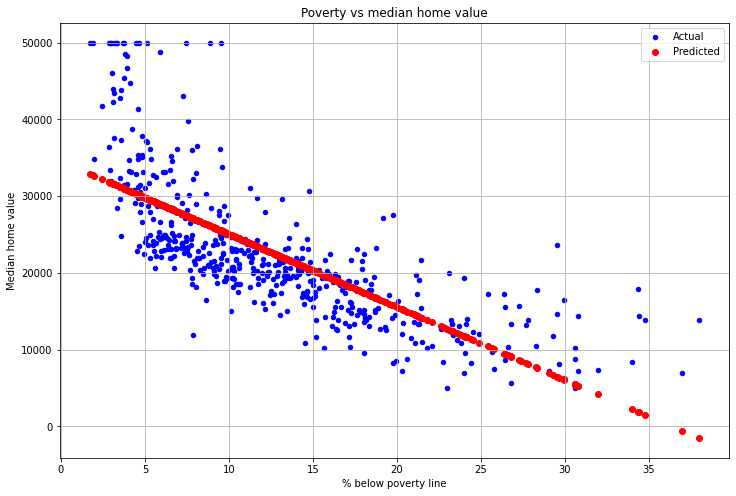

In [ ]:
ax = df.plot(x='pct_below_poverty_line', y='median_home_value', label='Actual', color='blue', kind='scatter', figsize=(12, 8))
ax.scatter(X, lr.predict(X), label='Predicted', color='red')

ax.set_xlabel('% below poverty line')
ax.set_ylabel('Median home value')
ax.set_title('Poverty vs median home value')

plt.grid()
plt.legend();

In blue is the actual measurements of poverty and home value for all neighborhoods. In red is the predicted value using the line of best fit. We can see that the regression line seems to fit the data fairly well, at least in all except the far left and right ends. 

One interesting thing to note is that the regression line generally seems too high. For example, if we draw the same graph, but only keep poverty values between 5% and 20% we get the following:

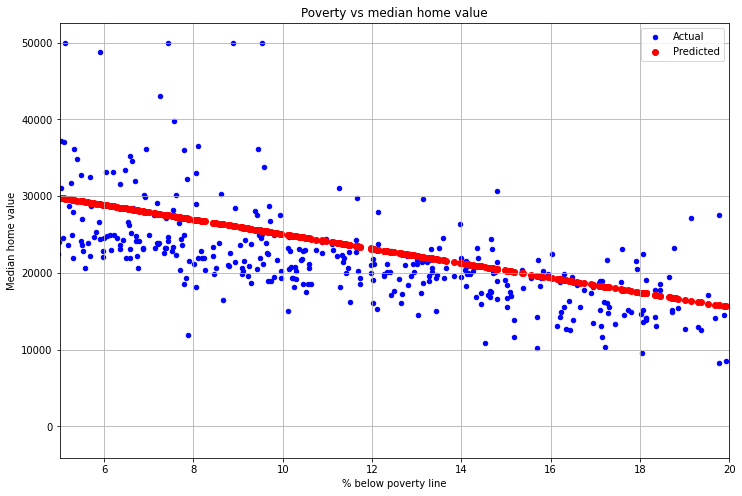

In [ ]:
ax = df.plot(x='pct_below_poverty_line', y='median_home_value', label='Actual', color='blue', kind='scatter', figsize=(12, 8))
ax.scatter(X, lr.predict(X), label='Predicted', color='red')

ax.set_xlabel('% below poverty line')
ax.set_ylabel('Median home value')
ax.set_title('Poverty vs median home value')

ax.set_xlim([5, 20])

plt.grid()
plt.legend();

Why is that? The reason is that the regression line is heavily affected by outliers. So the neighborhoods with low crime and high home value are throwing off the line and "dragging it up." In general, you want the following four things to be true before using LR for making predictions:
1. The data should be approximately linear
2. The observations should be independent (so the crime rate and median home value in one neighborhood should be independent of other neighborhoods)
3. the variance between the measurements should be approximately the same throughout the graph (the graph is more or less spread out the same amount in different areas)
4. The points should be approximately normally distributed around the regression line.

None of these four are perfectly satisfied. However, that doesn't mean you *can't* use LR. It just means that you need to be careful when making predictions. Don't just make a regression line and say "see, this predicts the future!" Use your brain, that's what it's there for.

## The mathematics of linear regression <a id="math_lr"></a>
In the example above, the equation of the regression line was given by $y=-950.05x + 34553.84$ (we'll explain how to see this later). How did those numbers come about? How did Python (or more specifically sklearn) decide that those parameters made the line "best fit" the data? What do we even mean by "best fit"?

To answer this, let's start by coming up with a way to measure our model being *wrong*. One simple way might be to take each point, see what the model predicts for that point, then take the difference. For example:

In [ ]:
df[['median_home_value', 'pct_below_poverty_line']].iloc[0]

median_home_value         24000.00
pct_below_poverty_line        4.98
Name: 0, dtype: float64

So in this neighborhood, 4.98% of the residents are below the poverty line, and the median home value is \$24,000 (this is from Boston in the 1980's). What does our linear model predict the home value would be for this poverty rate? Again, don't worry about the code right now, we'll get to that.

In [ ]:
print(f'${lr.predict([[4.98]])[0]:.2f}')

$29822.60


That's a difference of \$29,822.60 - \$24,000 = \$5,822.60 (or negative, depending on which way you subtract). In other words, our model was wrong by a little under six thousand dollars. Let's repeat that for the first ten measurements.

In [ ]:
for i in range(10):
    actual_x = df['pct_below_poverty_line'].iloc[i]
    actual_y = df['median_home_value'].iloc[i]
    predicted_y = lr.predict(actual_x.reshape(-1, 1))
    diff = actual_y - predicted_y
    print(f'Actual = {actual_y}, Predicted = {predicted_y[0]:.2f}, Diff = {diff[0]:.2f}')

Actual = 24000.0, Predicted = 29822.60, Diff = -5822.60
Actual = 21600.0, Predicted = 25870.39, Diff = -4270.39
Actual = 34700.0, Predicted = 30725.14, Diff = 3974.86
Actual = 33400.0, Predicted = 31760.70, Diff = 1639.30
Actual = 36200.0, Predicted = 29490.08, Diff = 6709.92
Actual = 28700.0, Predicted = 29604.08, Diff = -904.08
Actual = 22900.0, Predicted = 22744.73, Diff = 155.27
Actual = 27100.0, Predicted = 16360.40, Diff = 10739.60
Actual = 16500.0, Predicted = 6118.86, Diff = 10381.14
Actual = 18900.0, Predicted = 18308.00, Diff = 592.00


Let's now write this mathematically. Let $y$ be the actual y-value (median home value, in this case) and $\hat{y}$ (pronounced "y-hat") be the predicted home value (using our linear regression model, in this case). Then we're looking at $\displaystyle\sum_{i=0}^N y_i - \hat{y_i}$. Since our predicted y values are given by a line, the equation for $\hat{y}$ is $\hat{y}=mx+b$, so let's plug that in too.

```{math}
\displaystyle\sum_{i=0}^N y_i - (mx_i+b)
```

Remember, all this is doing is taking the actual home value and subtracting the predicted home value. This will be zero if the predictions are perfect (i.e. they always equal the actual home value). The problem with this is the following: Suppose one neighborhood has an actual home value of \$10,000 and a predicted value of \$15,000. Then the difference is $y - \hat{y} = 10000 - 15000 = -5000$. Now suppose another neighborhood has an actual home value of \$20,000 and a predicted value of \$15,000. Then the difference is $y - \hat{y} = 20000 - 15000 = 5000$. Adding these together gives us $-5000 + 5000 = 0$, a perfect pair of predictions! 

But wait, this is "perfect"? One predicted \$5,000 too high, and the other \$5,000 too low. It just so happened that these two mistakes cancelled out, and it made our prediction look perfect. Obviously we don't want that. One solution would be to take the absolute value of the difference and add them up.

```{math}
\displaystyle\sum_{i=0}^N \mid y_i - (mx_i+b) \mid
```

We will call this our **loss function**, since it measures how far off our model is from being perfect. A "perfect model" (i.e. one in which every prediction is exactly equal to the actual value) should have a loss function which returns zero. Since there is generally no "perfect model", we'll think of this more generally: _A model which makes predictions which are close to being correct (i.e. matching real data) will have a loss function returning small values. A model which makes predictions which are far from correct will have a loss function returning large values._ What exactly we mean by "small" and "large" is not clear. It can only be assessed in relationship to each other.

Let's keep exploring what we have. Let's write a function which computes the loss function from the first $N$ data points in our dataset.

In [ ]:
def loss_value(lr, df, N, x_col='pct_below_poverty_line', y_col='median_home_value'):
    diff = 0
    for i in range(N):
        actual_x = df[x_col].iloc[i]
        actual_y = df[y_col].iloc[i]
        predicted_y = lr.predict(actual_x.reshape(-1, 1))
        diff = diff + np.abs(actual_y - predicted_y) # Absolute value
    return diff[0]

Now let's test it out with a few data points.

In [ ]:
loss_value(lr, df, 5)

22417.069296777354

In [ ]:
loss_value(lr, df, 10)

45189.1692244646

In [ ]:
loss_value(lr, df, 100)

383234.58817355137

In [ ]:
loss_value(lr, df, 200)

809654.8108495052

Let's graph the loss values to see how they change as $N$ gets bigger.

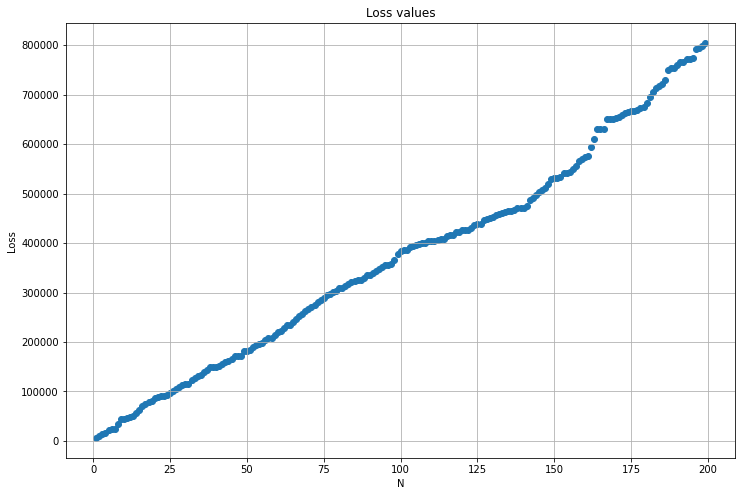

In [ ]:
plt.figure(figsize=(12, 8))

N = 200
loss_values = [loss_value(lr, df, n) for n in range(1, N)]
plt.scatter(range(1, N), loss_values)

plt.title('Loss values')
plt.xlabel('N')
plt.ylabel('Loss')
plt.grid()

Notice our loss value keeps getting bigger and bigger. This is because we're adding up more and more errors. That's a problem, because it makes it look like the model is worse and worse, just because we tested it on more and more data. Any prediction which isn't perfect will make our loss value higher, and thus make our model seem "worse". Let's fix that by taking an *average*. That means it will only see *on average* how far off our predictions are.

```{math}
\frac{1}{N} \displaystyle\sum_{i=0}^N \mid y_i - (mx_i+b) \mid
```

In [ ]:
def loss_value_avg(lr, df, N, x_col='pct_below_poverty_line', y_col='median_home_value'):
    diff = 0
    for i in range(N):
        actual_x = df[x_col].iloc[i]
        actual_y = df[y_col].iloc[i]
        predicted_y = lr.predict(actual_x.reshape(-1, 1))
        diff = diff + np.abs(actual_y - predicted_y) # Absolute value
    return diff[0] / N

In [ ]:
loss_value_avg(lr, df, 5)

4483.413859355471

In [ ]:
loss_value_avg(lr, df, 10)

4518.9169224464595

In [ ]:
loss_value_avg(lr, df, 100)

3832.3458817355136

In [ ]:
loss_value_avg(lr, df, 200)

4048.2740542475262

And how about a graph to illustrate this.

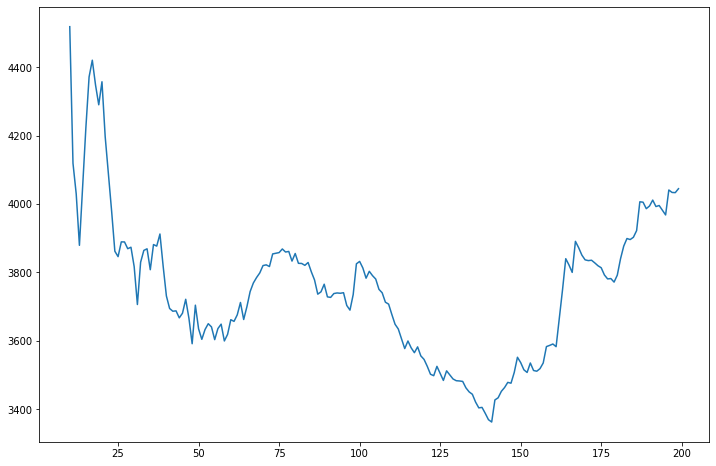

In [ ]:
fig = plt.figure(figsize=(12, 8))
plt.plot(range(10, 200), [loss_value_avg(lr, df, x) for x in range(10, 200)])

Much better! Now we can see that our model generally has a loss value around 3,400 to 4,000. Is this good? We can't really say without comparing it to other models, but for now let's now worry about it.

This seems to answer our initial question of "what do we mean by a good model?". What we mean is a model which has a low loss value. We now turn to our second question: How do we find which parameters of the model (slope and y-intercept in the case of a linear model) give a good model? Should the slope be 50? 100? -15? How can we know? If our goal is to make the loss value be as small as possible, then in fact we do know! Calculus tells us that to make a function as small as possible (that is, to find its *minimum*) we should find its critical points. Let's write the loss function as a *function* and later we'll try differentiating it.

```{math}
L(m, b) = \frac{1}{N} \displaystyle\sum_{i=0}^N \Bigl\lvert y_i - (mx_i+b) \Bigr\rvert
```

Notice that we have two variables, $m$ and $b$. These may not be the variables you would have guessed from looking at the question. You may have thought it was $y_i$, $x_i$ or $N$. But remember that $y_i$, $x_i$ and $N$ are not *variables*, they are actual numbers from our data. Remember that $y_i$ is simply the median home value of the $i$th row, $x_i$ is the poverty rate of the $i$th row, and $N$ is the number of data points in our dataset. There's nothing "variable" about them, they are whatever they are. However, what we *don't* know values for are the slope and y-intercept. That's why *these* are the variables.

Let's now take the (partial) derivatives with respect to these. If you have a hard time thinking about derivatives with so many letters involved, just try a simple little example. Suppose the y-values are `[1, 2, 3]` and the x-values are `[4, 5, 6]`. Then this looks like

```{math}
L(m, b) = \frac{1}{N} \displaystyle\sum_{i=0}^N \Bigl\lvert y_i - (mx_i+b) \Bigr\rvert = \frac13 \Bigl\lvert (1 - (4x+b)) + (2 - (5x+b)) + (3 - (6x+b)) \Bigr\rvert  
```

How would you take the derivative of this? Absolute values are tricky, and require splitting up as a piecewise function. It sure would be nice if we didn't have to deal with that. In addition, the derivative doesn't exist at zero, so that could be an issue. Wouldn't it be nice if there was a function which only returned positive values (like absolute value), but which was easy to take the derivative of (*unlike* absolute value)...

Squaring! That is exactly what squaring does. It is simple to take the derivative of, and only returns positive values. Let's use that to redefine our loss function:

```{math}
L(m, b) = \frac{1}{N} \displaystyle\sum_{i=0}^N \Bigl( y_i - (mx_i+b) \Bigr)^2
```

We'll refer to this equation as **mean squared error**, or **MSE** for short.

Next, let's use what we know about linear algebra and matrices to rewrite this. Let $X$ be the matrix of $x$ values. Each row is one measurement (a neighborhood in our housing example). In general we may have many measurements for $X$, such as using `pct_below_poverty_line`, `pupil_teacher_ratio` and `distance_to_downtown` all to predict `median_home_value`. That's why it's a matrix. Let $y$ be the column vector of $y$ values. So in our example $y$ would be the median home values. $y$ is a *vector* and not a *matrix* (like $X$) because we're always predicting a *number*, just a single value. Finally, $m$ is a column vector of slopes, one for each column. Finally, $b$ is a column vector (check the dimensions for yourself to make sure everything matches up). For a simple example, let's take the first three rows of data below and write out exactly what we have:

In [ ]:
df[['median_home_value', 'pct_below_poverty_line', 'pupil_teacher_ratio', 'distance_to_downtown']].iloc[:3]

median_home_value  ...  distance_to_downtown
0            24000.0  ...                4.0900
1            21600.0  ...                4.9671
2            34700.0  ...                4.9671

[3 rows x 4 columns]

```{math}
y = \begin{pmatrix}
24000 \\
21600 \\
34700
\end{pmatrix} \hspace{0.5cm}
X = \begin{pmatrix}
4.98 & 15.3 & 4.09 \\
9.14 & 17.8 & 4.9671 \\
4.03 & 17.8 & 4.9671
\end{pmatrix}
```

```{math}
m = \begin{pmatrix}
m_{\text{poverty}} \\
m_{\text{pupil}} \\
m_{\text{downtown}}
\end{pmatrix} \hspace{0.5cm}
b = \begin{pmatrix}
b_1 \\
b_2 \\
b_3
\end{pmatrix}
```

This gives the equation

```{math}
L(m, b) = \frac{1}{N}(y - Xm - b)^2
```

So, we're trying to pick values of $m$ and $b$ to make the two sides of the following equation as close as possible:

```{math}
\begin{pmatrix}
24000 \\
21600 \\
34700
\end{pmatrix} 
\approx
\begin{pmatrix}
4.98 & 15.3 & 4.09 \\
9.14 & 17.8 & 4.9671 \\
4.03 & 17.8 & 4.9671
\end{pmatrix}
\begin{pmatrix}
m_{\text{poverty}} \\
m_{\text{pupil}} \\
m_{\text{downtown}}
\end{pmatrix}
+
\begin{pmatrix}
b_1 \\
b_2 \\
b_3
\end{pmatrix}
```

or equivalently

```{math}
\begin{align}
24000 &\approx 4.98\cdot m_{poverty} + 15.3\cdot m_{pupil} + 4.09\cdot m_{downtown} + b_1 \\ 
21600 &\approx 9.14\cdot m_{poverty} + 17.8\cdot m_{pupil} + 4.9671\cdot m_{downtown} + b_2 \\ 
34700 &\approx 4.03\cdot m_{poverty} + 17.8\cdot m_{pupil} + 4.9671\cdot m_{downtown} + b_3
\end{align}
```

This is a system of equation in three variables which can be solved (assuming the system isn't singular). This simplest way to solve it is to include the $b_i$ terms into the $X$ matrix. We can do noting that

```{math}
\begin{pmatrix}
4.98 & 15.3 & 4.09 \\
9.14 & 17.8 & 4.9671 \\
4.03 & 17.8 & 4.9671
\end{pmatrix}
\begin{pmatrix}
m_{\text{poverty}} \\
m_{\text{pupil}} \\
m_{\text{downtown}}
\end{pmatrix}
+
\begin{pmatrix}
b_1 \\
b_2 \\
b_3
\end{pmatrix}
=
\begin{pmatrix}
4.98 & 15.3 & 4.09 & b_1\\
9.14 & 17.8 & 4.9671 & b_2\\
4.03 & 17.8 & 4.9671 & b_3
\end{pmatrix}
\begin{pmatrix}
m_{\text{poverty}} \\
m_{\text{pupil}} \\
m_{\text{downtown}} \\
1
\end{pmatrix}
```

We'll call this augmented $X$ matrix $X_b$, and the augmented $m$ vector $m_1$. For simplicity, we'll just call these $X$ and $m$. Then more generally we can write

```{math}
L(m, b) = \frac{1}{N}(y - X m)^2
```

Note that $y-X m$ is a vector (a column vector with the same dimensions as $y$). Thus by squaring it we mean the dot product with itself, or equivalently, $(y-X m)^2 = (y-X m)^T(y-X m)$ where the $T$ indicates vector transpose. Using the properties of transpose and multiplying everything out we get

```{math}
N\cdot L(m, b) = y^T y - y^T X m - m^T X^T y + m^T X^T X m
```

We now can take the partial derivative of both sides with respect to $m$ and find the critical points. Doing so will give the closed form of the values of $m$ and $b$ which produce the line of best fit.

The point of the above math is to show that, if you define the loss function in the way we did (mean squared error), then we can just do some linear algebra and solve for what exactly the coefficients should be. Having said that, that's generally *not* how we'll find parameters for our models. Instead, we'll use something called "gradient descent". We'll cover gradient descent soon, so let's leave it there for now.

## Linear regression using scikit-learn <a id="lr_sklearn"></a>

We'll now turn to actually *doing* linear regression by writing code. While we *could* write everything by hand, there are plenty of Python libraries that already exist to help you. We will be using the most popular (and extremely powerful) library called scikit-learn, or sklearn for short. Sklearn is used to build machine learning models. It comes with [many, many models](https://scikit-learn.org/stable/) ready to go. Even though you won't understand all of it, I highly encourage you to poke around their site and see what they have. It is a truly impressive package which is used across all industries. If you work as a data scientist, or any position which writes or uses machine learning models, you almost certainly will be using sklearn.

For this lesson we will be using their `linear_model` package, which contains linear regression (among other linear models). We have imported it at the top of this notebook using `from sklearn.linear_model import LinearRegression`.

Being able to read and understand the sklearn documentation is essential. Therefore, we will now take some time to familiarize ourself with it. [Here is the link](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression) to the documentation on `linear_model.LinearRegression`. I have also pasted a screenshot of (part of) it below.

![Sklearn LinearRegression](https://drive.google.com/uc?id=12F9X2p5--NITMLTsopvXXbV5bfKz5IHE)

At the very top is a short code snippet showing how to call this function. They say to call it using the command `sklearn.linear_model.LinearRegression(...)`. Rather than directly referencing `sklearn.linear_model` each time, we simply import `LinearRegression` from `sklearn.linear_model`. That way we can just type `LinearRegression(...)`, and Python will know we mean the `LinearRegression` function coming from `sklearn.linear_model`. If you need more reference on this, see homework 1 where we cover importing from packages.

Next is a brief description of what the function does.

Next are a list of the parameters, along with a description of each. Parameters are organized as follows:
**name: data_type, (optional), default_value**
That is, first is the name of the parameter. Next is the data type. If the parameter is optional (meaning you aren't required to specify it when you call this function) then that is stated. Finally, for any required parameters (i.e. ones that aren't optional) the default value is specified. What this means is that if you *do not* specify what value, then the default value will be used. Often the default values are a good starting point, and you should use them unless you have a good reason to do otherwise.

Let's go through each parameter for using `LinearRegression`.
- **fit_intercept:** As you know, a line has both a slope and y-intercept. LinearRegression always computes the best slope, but it's up to you whether or not to compute the best y-intercept as well. Generally there's no reason *not to* have it compute the y-intercept. That's why this parameter defaults to `True`. Therefore, we don't need to specify it.
- **normalize:** This parameter gives you the option to normalize your data before fitting a line to it. As you can see in the description, this means subtracting the mean and dividing by the standard deviation (this should sound familiar from MATH 3320...). We have no reason to do this, so we'll keep the default value of `False`.
- **copy_X:** Copies X. I have no idea why this matters and have never used it. We'll leave the default value of `False`.
- **n_jobs:** By "jobs" this is referring to parallel processing. We won't worry about this for now, and will leave it as the default value of `None` (meaning 1).

So as you can see, we're not actually specifying any parameters at all. That means we can just **instantiate** (meaning call) the function, as down below.

In [ ]:
lr = LinearRegression()

Note that we called it with no parameters, so the default values will be used. We also saved it to a variable we called `lr` (for "**l**inear **r**egression"). This is because we will now use this **instance** of the `LinearRegression` function to, you guessed it, do linear regression!

So how do we actually *do* linear regression? The answer is that we use one of the **methods** (i.e. functions) from `LinearRegression`. If you scroll further down the sklearn documentation page you will see a section called "Methods". Below is a screenshot of it.

![Sklearn methods](https://drive.google.com/uc?id=1MTcFMZJxWXCOrr2bLlTLXOH-zYHtBE-S)

First is a collection of small usage examples. You can see that they imported `LinearRegression` just like we did. Next they made some fake data using `numpy` which they saved to `X`, and more fake data for `y`. Next they created a `LinearRegression` object just like we did using the default values. However, they also combined one more step, namely using `.fit(...)`, which we will do next.

If you look down at the "Methods" section you will see **fit**. **Nearly every sklearn model has a `.fit(...)` method**. This method is used to "train" your model based on the data you give it. That is, in the case of linear regression, the model will determine the best possible slope and y-intercept based on the data you train it on. If you look at the fit method you will see the same setup as above, where it lists the parameters. Let's go through them.

- **X:** This is the input data. In our home price example, this would be the features we are using to predict home price, such as crime rate, pupil-teacher ratio, etc. We see that it should be a matrix (array) with shape (`n_samples`, `n_features`). A **sample** is simply an observation in your data, which is usually represented as a row. A **feature** is simply a variable in your data, usually represented as a column. So sklearn wants your X to be written as a matrix with samples as rows and features as columns. That is exactly what we have (not an accident!).
- **y:** This is what we want to predict, so median home value in our pricing example. The formatting gives us two options. First, we can have the number of samples (rows) first, and then nothing for columns. In Pandas/numpy, having nothing just means its one column. The alternative is to format it with observations as rows, and the value to want to predict in the columns.
- **sample_weight:** The weight (numerical importance) to assign to each sample. We have no reason to make any sample (row of our data) any more or less important than any other, so we will leave the default value of `None`.

Let's now form our `X` and `y` parameters and then fit our model! We will use three columns from our data as the input, and the home value as the output.

In [ ]:
X = df[['crime_rate', 'avg_num_rooms', 'pct_below_poverty_line']]
y = df['median_home_value']

Let's check if the shapes match what sklearn wants. Remember that `X` should have `(n_samples, n_features)`, which is another way of saying `(number of rows, number of columns)`.

In [ ]:
X.shape

(506, 3)

That's perfect. We have 506 rows and 3 columns. Now let's check `y`. Remember that `y` can either be of shape `(n_samples, )` or `(n_samples, n_targets)`.

In [ ]:
y.shape

(506,)

As mentioned above, the blank value after the comma means 1 to Pandas/numpy. This matches the first option for the shape of `y`, so we're good to go! Let's go ahead and fit it. We will use the variable `lr` that we saved earlier, which is just the `LinearRegression` object.

In [ ]:
lr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

We can see that it printed out some basic information about the parameters of the `LinearRegression` object, but not much more. So what did it do? It used the data we gave it (`X` and `y`) to find the line of best fit. How can you see this line? By accessing its **attributes**. Attributes are just constant. They are numbers/text/whatever that the object is storing. On the sklearn documentation page the attributes are listed. Here is a screenshot.

![Sklearn attributes](https://drive.google.com/uc?id=1tNZK1_K0D7AcZ3C-3swIl_HKfWDt0enh)

The **coef_** attribute holds the coefficients, in other words, the slopes. Remember from our earlier mathematical work that the line has three slopes because we have three variables (`'crime_rate', 'avg_num_rooms', 'pct_below_poverty_line'`). At the bottom the **intercept_** is the y-intercept. Let's look at all of these. You access an attribute in exactly the same way as you accessed the `.fit(...)` method. However, since it's a *constant* and not a *function*, we don't use the parentheses. To makea sense of this, just think about how you write functions in math. You know that sine is a *function*, so you write sin(...) (for example, sin(pi/2)). However, you know that pi is a *constant*, so you write pi, not pi(). It's the exact same idea here.

In [ ]:
lr.coef_

array([-102.94088672, 5216.95492439, -578.48581963])

So the slope for the first variable (crime rate) is -102.94, for the second variable (average number of rooms) the coefficient is 5216.95, and for percent below poverty line the coefficient is -578.48. We'll return to these in a second, but first let's look at the y-intercept.

In [ ]:
lr.intercept_

-2562.251011928376

So that means the line has the following formula:

In [ ]:
print(f'median_home_value = {lr.coef_[0]:.2f}crime_rate + {lr.coef_[1]:.2f}avg_num_rooms + {lr.coef_[2]:.2f}pct_below_poverty_line + {lr.intercept_:.2f}')

median_home_value = -102.94crime_rate + 5216.95avg_num_rooms + -578.49pct_below_poverty_line + -2562.25


So what do we learn from these coefficients? Just like any slope, they tell us how much the y values are changing for every unit change in the x. So for instance, the first coefficient of -102.94 means that for every 1% the crime rate increases (the x value), the median home value (the y value) decreases by \\$102.94. Similarly, for every extra room (the x value), the median home value (the y value) increases by \\$5,216.95. Finally, for every 1% the poverty level increases, the median home value drops by \\$578.49. The y-intercept can be interpreted as it always is: if all the x values are zero (zero crime, zero rooms, zero poverty), then the predicted home value is -\\$2,562.25. Obviously this is meaningless, and thus y-intercept (and all values returned by any model!) should always be interpreted using logic. Don't just trust the numbers, use your brain!

It is interesting to see the equation, but to actually *use* the regression line, we will continue to work with the `LinearRegression` object that we saved in `lr`. In particular, back in the methods section of the sklearn documentation you will see a function called `.predict()`. Below is a screenshot.

![Sklearn attributes](https://drive.google.com/uc?id=1Tl_7Y3pnA5dvCraPt61PhNBw3TeNo9PY)

As you can see, **predict** simple takes in an X value of samples (observations) and then predicts what the y values will be. Let's take the same X values as we used to train our model and see what the predicted home prices are.

In [ ]:
# We actually defined this above and don't need to do it again. But I'm leaving them here for clarity.
X = df[['crime_rate', 'avg_num_rooms', 'pct_below_poverty_line']]
y = df['median_home_value']

In [ ]:
# Big output coming...
lr.predict(X)

array([28857.71764778, 25645.64485054, 32587.46300992, 32241.91904276,
       31632.88834584, 27965.78524617, 21602.4146046 , 18543.91123028,
        9478.59635279, 18850.73477002, 18853.08515341, 21097.83183626,
       19062.73051503, 23630.2929103 , 23239.36952965, 22909.10504177,
       24485.44728242, 20120.1957678 , 19056.32414487, 20715.21529903,
       14207.55561567, 20468.71647343, 18524.16003551, 16161.8600086 ,
       18836.43867049, 17010.15279468, 19127.36596361, 18890.05264132,
       23837.68045468, 25222.25294238, 14052.02636331, 21432.18812292,
       12305.90780482, 16445.83514372, 17307.87951492, 22783.59410375,
       21299.42893944, 22875.36497493, 22684.0209119 , 29341.66371693,
       32932.78066976, 29943.54367259, 26245.57516912, 25519.9168657 ,
       23562.27902933, 21156.50052322, 19418.08588738, 17996.85251596,
        7754.80691906, 17269.03687779, 20756.68298329, 23879.84252534,
       28345.41974161, 23847.28167951, 19592.18945627, 32471.58888754,
      

As you can see, this returns many, many predictions. Let's save those.

In [ ]:
y_pred = lr.predict(X)

Notice that this is exactly the $R^2$ value we got using `np.corrcoef(...)**2`! So sklearn is doing that work for us. It doesn't make a scatterplot, but it does at least compute the correlation coefficient.

### Linear regression with just one variable

We have just one final topic to cover. Up to this point we've been using multiple variables to predict home price. But what if we wanted to use just a single variable, like `pct_below_poverty_line`. Let's try doing the same thing.

In [ ]:
lr_single = LinearRegression()

X_single = df['pct_below_poverty_line']
y = df['median_home_value'] # y is the same regardless, it's just the home prices

```{warning}
An error is coming!
```

In [ ]:
lr_single.fit(X_single, y)

ValueError: Expected 2D array, got 1D array instead:
array=[ 4.98  9.14  4.03  2.94  5.33  5.21 12.43 19.15 29.93 17.1  20.45 13.27
 15.71  8.26 10.26  8.47  6.58 14.67 11.69 11.28 21.02 13.83 18.72 19.88
 16.3  16.51 14.81 17.28 12.8  11.98 22.6  13.04 27.71 18.35 20.34  9.68
 11.41  8.77 10.13  4.32  1.98  4.84  5.81  7.44  9.55 10.21 14.15 18.8
 30.81 16.2  13.45  9.43  5.28  8.43 14.8   4.81  5.77  3.95  6.86  9.22
 13.15 14.44  6.73  9.5   8.05  4.67 10.24  8.1  13.09  8.79  6.72  9.88
  5.52  7.54  6.78  8.94 11.97 10.27 12.34  9.1   5.29  7.22  6.72  7.51
  9.62  6.53 12.86  8.44  5.5   5.7   8.81  8.2   8.16  6.21 10.59  6.65
 11.34  4.21  3.57  6.19  9.42  7.67 10.63 13.44 12.33 16.47 18.66 14.09
 12.27 15.55 13.   10.16 16.21 17.09 10.45 15.76 12.04 10.3  15.37 13.61
 14.37 14.27 17.93 25.41 17.58 14.81 27.26 17.19 15.39 18.34 12.6  12.26
 11.12 15.03 17.31 16.96 16.9  14.59 21.32 18.46 24.16 34.41 26.82 26.42
 29.29 27.8  16.65 29.53 28.32 21.45 14.1  13.28 12.12 15.79 15.12 15.02
 16.14  4.59  6.43  7.39  5.5   1.73  1.92  3.32 11.64  9.81  3.7  12.14
 11.1  11.32 14.43 12.03 14.69  9.04  9.64  5.33 10.11  6.29  6.92  5.04
  7.56  9.45  4.82  5.68 13.98 13.15  4.45  6.68  4.56  5.39  5.1   4.69
  2.87  5.03  4.38  2.97  4.08  8.61  6.62  4.56  4.45  7.43  3.11  3.81
  2.88 10.87 10.97 18.06 14.66 23.09 17.27 23.98 16.03  9.38 29.55  9.47
 13.51  9.69 17.92 10.5   9.71 21.46  9.93  7.6   4.14  4.63  3.13  6.36
  3.92  3.76 11.65  5.25  2.47  3.95  8.05 10.88  9.54  4.73  6.36  7.37
 11.38 12.4  11.22  5.19 12.5  18.46  9.16 10.15  9.52  6.56  5.9   3.59
  3.53  3.54  6.57  9.25  3.11  5.12  7.79  6.9   9.59  7.26  5.91 11.25
  8.1  10.45 14.79  7.44  3.16 13.65 13.    6.59  7.73  6.58  3.53  2.98
  6.05  4.16  7.19  4.85  3.76  4.59  3.01  3.16  7.85  8.23 12.93  7.14
  7.6   9.51  3.33  3.56  4.7   8.58 10.4   6.27  7.39 15.84  4.97  4.74
  6.07  9.5   8.67  4.86  6.93  8.93  6.47  7.53  4.54  9.97 12.64  5.98
 11.72  7.9   9.28 11.5  18.33 15.94 10.36 12.73  7.2   6.87  7.7  11.74
  6.12  5.08  6.15 12.79  9.97  7.34  9.09 12.43  7.83  5.68  6.75  8.01
  9.8  10.56  8.51  9.74  9.29  5.49  8.65  7.18  4.61 10.53 12.67  6.36
  5.99  5.89  5.98  5.49  7.79  4.5   8.05  5.57 17.6  13.27 11.48 12.67
  7.79 14.19 10.19 14.64  5.29  7.12 14.   13.33  3.26  3.73  2.96  9.53
  8.88 34.77 37.97 13.44 23.24 21.24 23.69 21.78 17.21 21.08 23.6  24.56
 30.63 30.81 28.28 31.99 30.62 20.85 17.11 18.76 25.68 15.17 16.35 17.12
 19.37 19.92 30.59 29.97 26.77 20.32 20.31 19.77 27.38 22.98 23.34 12.13
 26.4  19.78 10.11 21.22 34.37 20.08 36.98 29.05 25.79 26.64 20.62 22.74
 15.02 15.7  14.1  23.29 17.16 24.39 15.69 14.52 21.52 24.08 17.64 19.69
 12.03 16.22 15.17 23.27 18.05 26.45 34.02 22.88 22.11 19.52 16.59 18.85
 23.79 23.98 17.79 16.44 18.13 19.31 17.44 17.73 17.27 16.74 18.71 18.13
 19.01 16.94 16.23 14.7  16.42 14.65 13.99 10.29 13.22 14.13 17.15 21.32
 18.13 14.76 16.29 12.87 14.36 11.66 18.14 24.1  18.68 24.91 18.03 13.11
 10.74  7.74  7.01 10.42 13.34 10.58 14.98 11.45 18.06 23.97 29.68 18.07
 13.35 12.01 13.59 17.6  21.14 14.1  12.92 15.1  14.33  9.67  9.08  5.64
  6.48  7.88].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

What happened? If you read the error it says "Expected 2D array, got 1D array instead". Let's go back to the sklearn documentation. It said that the `X` should be of shape `(n_samples, n_features)`. Let's look at the shape of our X.

In [ ]:
X_single.shape

(506,)

Well there's the problem, it doesn't have anything for `n_features`. We want to have a 1 there so that sklearn knows that there is one feature. If you remember, earlier I said that having nothing there means implicitly there is a 1. But sklearn wants you to be *explicit*, and just write the darn 1. There are several ways to do this, but the easiest way is just to access the column you want using double brackets. Rather than typing `df['my_col']`, which will results in an object with shape `(506,)` (like we just got), you can do `df[['my_col']]` (note the extra brackets), which will give the proper shape.

In [ ]:
X_single = df[['pct_below_poverty_line']]
X_single.shape

(506, 1)

Ta-da! Now let's do everything again.

In [ ]:
lr_single.fit(X_single, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

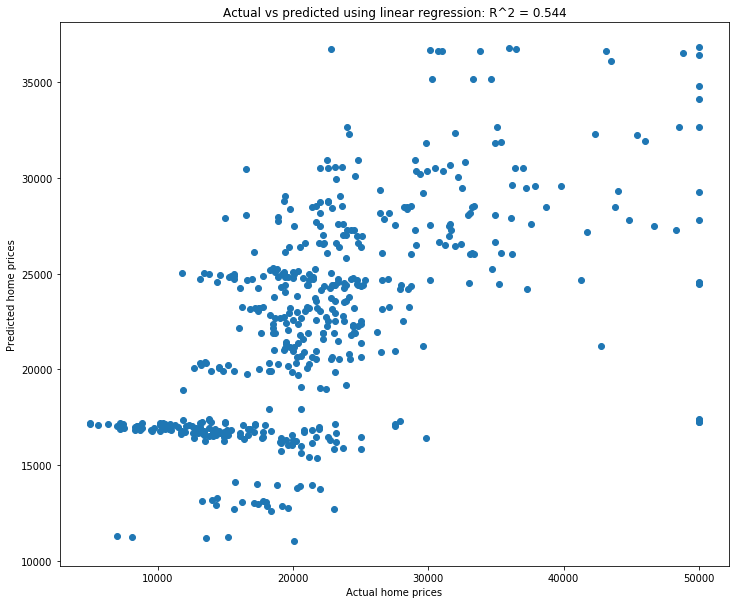

In [ ]:
fig = plt.figure(figsize=(12, 10))
plt.scatter(y, y_weak_pred)

plt.xlabel('Actual home prices')
plt.ylabel('Predicted home prices')
plt.title('Actual vs predicted using linear regression');

## Gradient descent <a id="gradient_descent"></a>

Gradient descent is a large and important topic. This week we will look at it from the "big picture" perspective, and next week we'll do it mathematically.

As we learned last week, linear regression is the process of fitting a line to data in the "best" way possible. We measured "best" in terms of mean squared error (MSE), given specifically by
$$
L(m, b) = \displaystyle\sum_i (y_i - (mx_i + b))^2
$$
where $y_i$ are the values to be predicted (median home value in our example last week) and $x_i$ are the data being used to make predictions (things like poverty rate, distance to downtown, etc). We then showed that you could simply take derivatives and find critical points to solve for what values of $m$ and $b$ will make this "error" as small as possible, i.e. minimize it. 

None of this is common in machine learning. In fact, linear regression is largely the only case of machine learning where we can actually *solve* for what value of the **model parameters**, the variables used in the model, will give the smallest error. Instead, we do what is called "model training".

We'll cover model training more in-depth next week. This week, what we want to do is get the general idea of *how* we train models. The answer is "gradient descent".

Recall from Calculus 3 that the gradient of a function $f$, written $\nabla f$ is defined as a vector of partial derivatives. So for example, if $f(x, y) = x^2 + 2y^2$, then
$$
\nabla f(x, y) = \biggl(\frac{\partial f}{\partial x}, \frac{\partial f}{\partial y}\biggr) = (2x, 4y)
$$
The important thing is that this is a vector, and the direction of vector is the direction in which $f$ is *increasing* as fast as possible. So for instance, at the point $(2, 1, f(2, 1)) = (2, 1, 6)$, we get $\nabla f(2, 1) = (4, 4)$. What this means is that at the point $(2, 1, 6)$, $f$ is increasing the fastest if we move our $(x, y)$ point in the direction $(4, 4)$. Below is a visualization using [GeoGebra](http://www.geogebra.org) of this surface.

![Surface in 3D](https://drive.google.com/uc?id=1oZohBqWQ6AGw1MTq67fd6x4TLNQQcDE2)

What the arrow (the gradient vector) is indicating is the direction your $(x, y)$ values should move in in order to make $f(x, y)$ increase as quickly as possible.


So how does all this relate to training models? The idea is that we have a loss function that we want to make as small as possible. In general it is *not* possible to just take the partial derivatives and find the critical points, as the functions are too complicated. So instead, we start with a random starting point. We then compute the gradient of the loss function at that point and move in the *negative of the direction* of the gradient. Why the negative? Because the *positive direction* is where the loss function is *increasing* as quickly as possible. We don't want it to *increase*, we want it to *decrease*. It is *decreasing* the quickest possible by moving the *opposite* (i.e. negative) direction of the gradient.

In order to get a visual explanation of gradient descent, please watch [this video](https://www.youtube.com/watch?v=sDv4f4s2SB8).

This has all been a *mathematical* explanation of the *idea* of gradient descent. But how does this actually work in Python? Luckily for all of us, everything is handled seemlessly behind the scenes. That is, we'll call a sample function and gradient descent will "just happen." We will go into that part next week.

## Exercises
Use the housing dataset we've been working with here to do the following exercises:
1. Write a function which takes in a list of column names and does everything we did above. Create a scatterplot comparing the actual and predicted home values and compute the $R^2$ score.
2. Figure out which single column gives the best $R^2$ value. Do the same for which best two columns. Can you write a function which, for $N$ columns, returns which $N$ columns give the best $R^2$ score?
3. In the scatterplot above there are a group of homes in the bottom left which form a horizontal line on the graph. Explain in plain English what's going on here.
4. We've only been predicting the home value. Try predicting something else. Pick a column that you think is interesting and use other columns to predict it. How good are the predictions?
5. Linear regression is exactly that, linear. That means that there are no squares, square roots, sin, etc. Can you transform one of the columns in such a way that it improves predictions for home value? For example, what if instead of using distance_to_downtown you used the square of it? First, create a new distance_to_downtown_squared column, then use it in your regression.
6. We chose not to normalize our data when we did linear regression (when instantiating `LinearRegression`. Try doing it. Does it change your results?
7. Get another dataset (either from your project, or just a dataset you find interesting) and try doing all this. Linear regression is an incredibly important tool to have, and being able to work easily with it is of fundamental importance to your success.